In [1]:
import nltk
from nltk import Tree
import os
import numpy as np

In [2]:
def extract_data(file_path):
    sentences = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                tree = Tree.fromstring(line)
                label = int(tree.label())
                sentence = ' '.join(tree.leaves())
                sentences.append(sentence)
                labels.append(label)

    return sentences, np.array(labels)

In [ ]:
dataset_path = "./sst5"
train_sentences, train_labels = extract_data(os.path.join(dataset_path, "train.txt"))
dev_sentences, dev_labels = extract_data(os.path.join(dataset_path, "dev.txt"))
test_sentences, test_labels = extract_data(os.path.join(dataset_path, "test.txt"))

In [4]:
for i in range(3):
    print(train_sentences[i])
    print(train_labels[i])
print()

for i in range(3):
    print(dev_sentences[i])
    print(dev_labels[i])
print()

for i in range(3):
    print(test_sentences[i])
    print(test_labels[i])

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
3
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
4
Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
3

It 's a lovely film with lovely performances by Buy and Accorsi .
3
No one goes unindicted here , which is probably for the best .
2
And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins .
3

Effective but too-tepid biopic
2
If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .
3
Emerges a

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

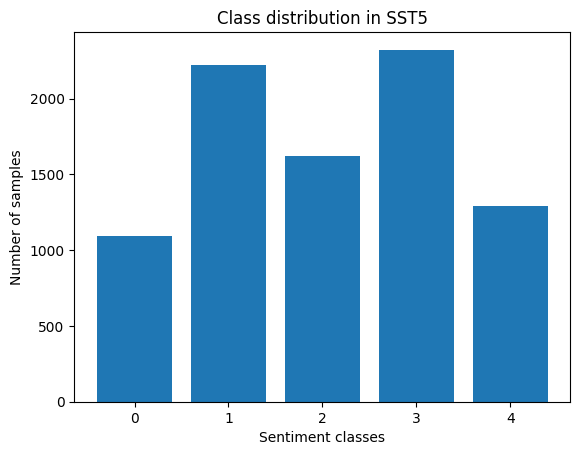

In [6]:
label_counts = Counter(train_labels)
plt.bar(label_counts.keys(), label_counts.values())

plt.xlabel("Sentiment classes")
plt.ylabel("Number of samples")
plt.title("Class distribution in SST5")
plt.show()

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
train_text = " ".join(train_sentences)

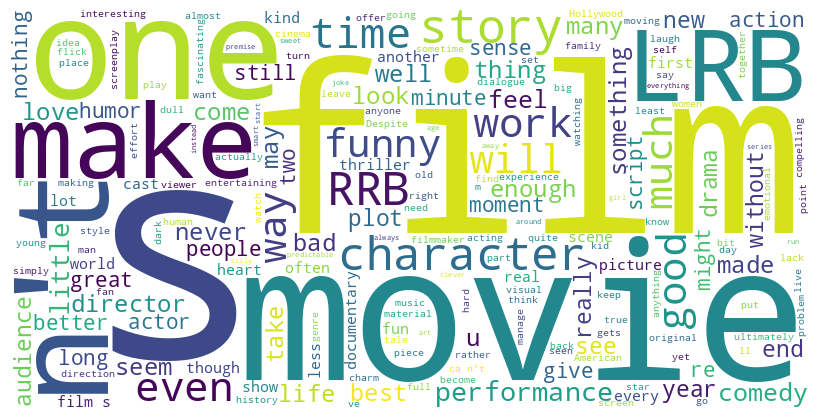

In [9]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(train_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [11]:
MAX_VOCAB_SIZE = 20000  # Set a vocabulary size limit
MAX_SEQUENCE_LENGTH = 50  # Set a max sentence length

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)  # Fit on training data

In [12]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
dev_sequences = tokenizer.texts_to_sequences(dev_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
dev_padded = pad_sequences(dev_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [13]:
train_labels_cat = to_categorical(train_labels, num_classes=5)
dev_labels_cat = to_categorical(dev_labels, num_classes=5)
test_labels_cat = to_categorical(test_labels, num_classes=5)

In [14]:
import numpy as np

In [ ]:
EMBEDDING_DIM = 100  # Choose the dimension of GloVe vectors
embedding_index = {}

with open("./glove.6B.100d.txt", "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

# Create an embedding matrix
word_index = tokenizer.word_index
num_words = min(MAX_VOCAB_SIZE, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, SpatialDropout1D

# 1D CNN

In [42]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(256, 1, activation='relu'),
    MaxPooling1D(1),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax') # 5 classes for SST5
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,533,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,533,700 (5.85 MB)

 Trainable params: 1,533,700 (5.85 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.fit(train_padded, train_labels_cat, validation_data=(dev_padded, dev_labels_cat), epochs=10, batch_size=16)

Epoch 1/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2758 - loss: 1.5701 - val_accuracy: 0.3606 - val_loss: 1.3936
Epoch 2/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4024 - loss: 1.3373 - val_accuracy: 0.4160 - val_loss: 1.3539
Epoch 3/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5163 - loss: 1.0889 - val_accuracy: 0.3960 - val_loss: 1.5209
Epoch 4/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6215 - loss: 0.8855 - val_accuracy: 0.3969 - val_loss: 1.6073
Epoch 5/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6960 - loss: 0.7279 - val_accuracy: 0.3960 - val_loss: 2.1350
Epoch 6/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7796 - loss: 0.5447 - val_accuracy: 0.3806 - val_loss: 2.2897
Epoch 7/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8376 - loss: 0.4189 - val_accuracy: 0.3878 - val_loss: 2.9104
Epoch 8/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8536 - loss: 0.3808 - val_accuracy: 0.

In [47]:
predictions = model.predict(test_padded)
test_preds = np.argmax(predictions, axis=1)
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test accuracy: 0.4000


In [49]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.3228    0.2939    0.3077       279
           1     0.4537    0.6651    0.5394       633
           2     0.2535    0.2314    0.2419       389
           3     0.3782    0.3804    0.3793       510
           4     0.6062    0.2431    0.3470       399

    accuracy                         0.4000      2210
   macro avg     0.4029    0.3628    0.3631      2210
weighted avg     0.4120    0.4000    0.3861      2210



# Multinomial Naive Bayes

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [21]:
vectorizer = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_sentences)
X_dev = vectorizer.transform(dev_sentences)
X_test = vectorizer.transform(test_sentences)

In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_labels)

MultinomialNB()

In [23]:
train_preds = nb_classifier.predict(X_train)
dev_preds = nb_classifier.predict(X_dev)
test_preds = nb_classifier.predict(X_test)

In [24]:
print(f"Train accuracy: {accuracy_score(train_labels, train_preds):.4f}")
print(f"Dev accuracy: {accuracy_score(dev_labels, dev_preds):.4f}")
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Train accuracy: 0.6773
Dev accuracy: 0.3678
Test accuracy: 0.3851


In [25]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.4000    0.0072    0.0141       279
           1     0.4423    0.6540    0.5277       633
           2     0.3571    0.0257    0.0480       389
           3     0.3328    0.7902    0.4683       510
           4     0.7333    0.0551    0.1026       399

    accuracy                         0.3851      2210
   macro avg     0.4531    0.3064    0.2321      2210
weighted avg     0.4492    0.3851    0.2880      2210



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs')
log_reg.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [28]:
train_preds = log_reg.predict(X_train)
dev_preds = log_reg.predict(X_dev)
test_preds = log_reg.predict(X_test)

In [29]:
print(f"Train accuracy: {accuracy_score(train_labels, train_preds):.4f}")
print(f"Dev accuracy: {accuracy_score(dev_labels, dev_preds):.4f}")
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Train accuracy: 0.8237
Dev accuracy: 0.3806
Test accuracy: 0.4063


In [30]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.4750    0.1362    0.2117       279
           1     0.4433    0.5987    0.5094       633
           2     0.2292    0.1131    0.1515       389
           3     0.3655    0.6608    0.4707       510
           4     0.6211    0.2506    0.3571       399

    accuracy                         0.4063      2210
   macro avg     0.4268    0.3519    0.3401      2210
weighted avg     0.4238    0.4063    0.3724      2210



# Transformer

In [31]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.9 MB/s eta 0:00:00


In [32]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [33]:
# bert tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [34]:
# hugging face dataset format
train_data = Dataset.from_dict({"text": train_sentences, "label": train_labels})
dev_data = Dataset.from_dict({"text": dev_sentences, "label": dev_labels})
test_data = Dataset.from_dict({"text": test_sentences, "label": test_labels})

In [35]:
# tokenize dataset
train_data = train_data.map(tokenize_function, batched=True)
dev_data = dev_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [36]:
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=500,
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [37]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5) # pre-trained model

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=dev_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-2fbe6ff9af92>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [38]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.218000,1.164895,0.473206
2,0.859600,1.192807,0.526794
3,0.565700,1.418057,0.519528


TrainOutput(global_step=1602, training_loss=0.8559237919496686, metrics={'train_runtime': 628.2948, 'train_samples_per_second': 40.796, 'train_steps_per_second': 2.55, 'total_flos': 1686061056909312.0, 'train_loss': 0.8559237919496686, 'epoch': 3.0})

In [39]:
predictions = trainer.predict(test_data)
test_preds = np.argmax(predictions.predictions, axis=1)
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Test accuracy: 0.5357


In [40]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.5775    0.4409    0.5000       279
           1     0.6077    0.5703    0.5884       633
           2     0.3650    0.4447    0.4009       389
           3     0.5123    0.5706    0.5399       510
           4     0.6537    0.5915    0.6211       399

    accuracy                         0.5357      2210
   macro avg     0.5433    0.5236    0.5301      2210
weighted avg     0.5475    0.5357    0.5389      2210

